In [1]:
import numpy as np
import os
from os.path import join as _join
from PySeismoSoil.class_gof_scores import (
    GOF_Scores,
    Batch_GOF_Scores
)

In [2]:
# Load in test data
f_dir = _join(os.path.abspath(''), 'tests\\files')
data = np.loadtxt(_join(f_dir, 'pgain_12.273_vs30_475.txt'))
meas = data[:, (0, 1)]
simu = data[:, (0, 2)]

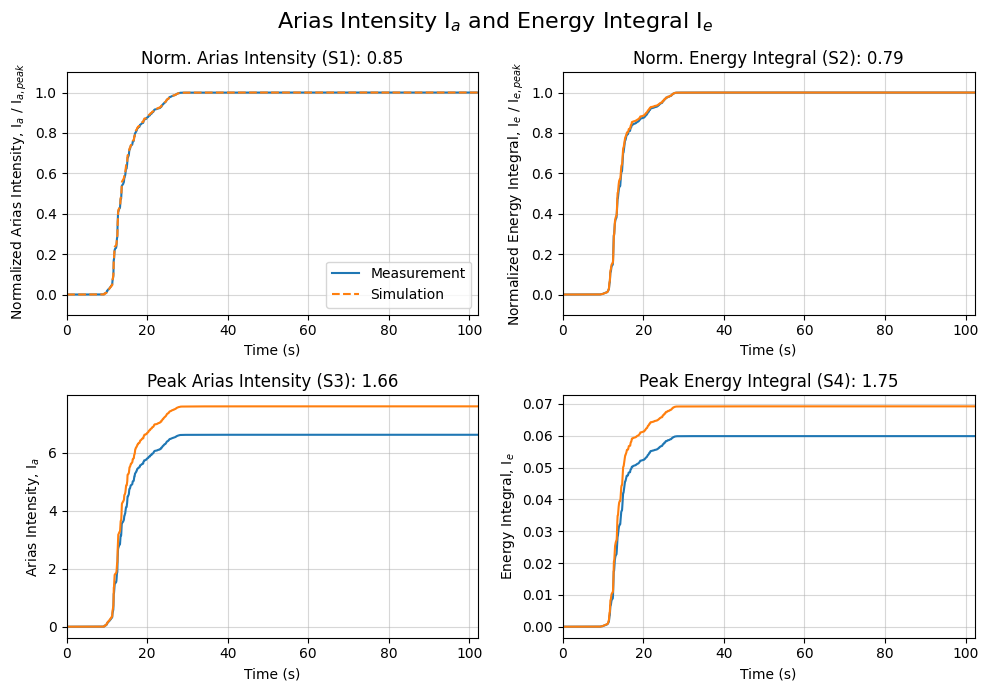

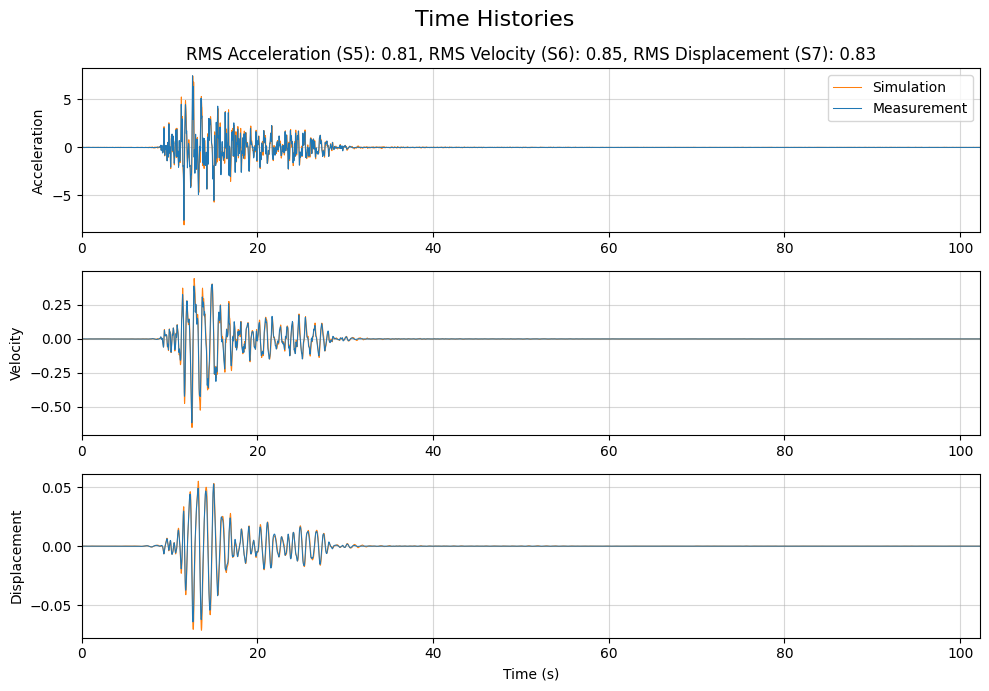

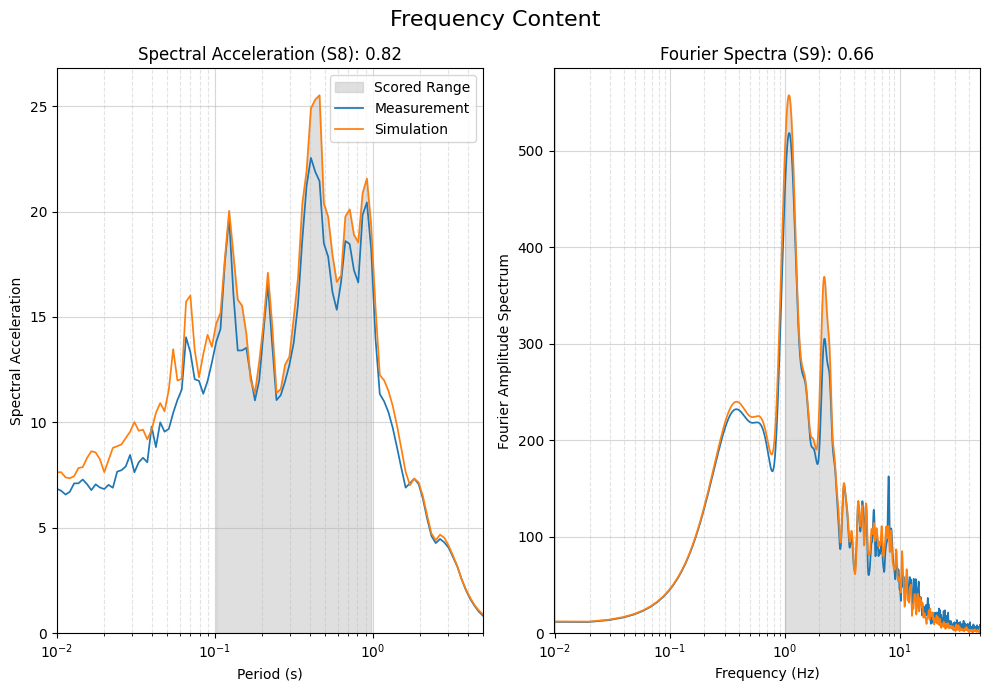

In [3]:
# Create GOF_Scores object
myScore = GOF_Scores(meas, simu)

# Calculate scores and plot
_ = myScore.calc_scores(fmin=1, fmax=10,  
                        show_fig=True, verbose=False)

In [4]:
# Print summary of calculated scores
print(myScore)


Goodness of Fit Scores
---------------------------------------
Normalized Arias Intensity (S1):  0.853
Normalized Energy Integral (S2):  0.794
      Peak Arias Intensity (S3):  1.659
      Peak Energy Integral (S4):  1.748
          RMS Acceleration (S5):  0.805
              RMS Velocity (S6):  0.848
          RMS Displacement (S7):  0.828
     Spectral Acceleration (S8):  0.822
           Fourier Spectra (S9):  0.660
---------------------------------------
Average Score: 1.002



## Batch GOF Scoring

In [5]:
# Create many GOF score objects
data = np.loadtxt(_join(f_dir, 'pgain_9.007_vs30_425.txt'))
meas = data[:, (0, 1)]
simu = data[:, (0, 2)]
myScore1 = GOF_Scores(meas, simu)

data = np.loadtxt(_join(f_dir, 'pgain_12.273_vs30_475.txt'))
meas = data[:, (0, 1)]
simu = data[:, (0, 2)]
myScore2 = GOF_Scores(meas, simu)

data = np.loadtxt(_join(f_dir, 'pgain_15.026_vs30_650.txt'))
meas = data[:, (0, 1)]
simu = data[:, (0, 2)]
myScore3 = GOF_Scores(meas, simu)

# Create batch score object
myBatchScore = Batch_GOF_Scores([myScore1, myScore2, myScore3])

# Run scoring in batch
calculated_batch_scores = \
    myBatchScore.run(parallel = True, n_cores = 2, \
                     options = dict(fmin=1, fmax=10),
                    )

Parallel computing in progress... done.


In [6]:
# Print outputs
for score in calculated_batch_scores:
    print(score)


Goodness of Fit Scores
---------------------------------------
Normalized Arias Intensity (S1):  0.946
Normalized Energy Integral (S2):  0.711
      Peak Arias Intensity (S3):  1.243
      Peak Energy Integral (S4):  1.410
          RMS Acceleration (S5):  0.607
              RMS Velocity (S6):  0.687
          RMS Displacement (S7):  0.679
     Spectral Acceleration (S8):  0.531
           Fourier Spectra (S9):  0.316
---------------------------------------
Average Score: 0.792



TypeError: unsupported operand type(s) for +: 'float' and 'NoneType'